In [1]:
from graph_tool.all import *
from tqdm import tqdm
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import plotly.express as px

In [52]:
# load dysregnet results and extract edges with values

dys = pd.read_csv("../data/TCGA/dysreg_KIRC.csv", sep="\t")
sample_list = dys.iloc[:,0].tolist()
dys = dys[dys.columns[1:]]
dys.index = sample_list
# for first row only
dys_edges = dict(zip([e.replace("(", "").replace(")", "").replace("'", "").replace(" ", "") for e in dys.columns.tolist()], dys.iloc[1].tolist()))

In [53]:
genes = [i.split(",")[1] for i in list(dys_edges.keys())]
gene_file = open("../data/TCGA/genes.txt", "w")
for g in genes:
    gene_file.write(f"{g}\n")
gene_file.close()

In [3]:
# print edges to file to upload to REMnet app

dys_edges_file = open("../data/TCGA/dysreg_edges_KIRC.csv", "w")
dys_edges_file.write("REM,GENE\n")
for e in dys_edges.keys():
    dys_edges_file.write(e+"\n")

In [8]:
g = load_graph("../data/graph-tool/CTID_0000055.gt")
epi_edges = {}
edges_to_mean = {}
for e in tqdm(g.edges()):
    e_name = f"{g.vp.name[e.source()]},{g.vp.name[e.target()]}"
    if e_name in dys_edges:
        if epi_edges.get(e_name) == None:
            edges_to_mean[e_name] = 1
            epi_edges[e_name] = g.ep["R_ENCBS610XAP"][e]
        else:
            edges_to_mean[e_name] += 1
            epi_edges[e_name] = epi_edges.get(e_name) + g.ep["R_ENCBS610XAP"][e]

2404861it [00:09, 241769.77it/s]


In [54]:
epi_edges_vals = []
for e in dys_edges:
    epi_edges_vals.append(epi_edges[e]/edges_to_mean[e])
dys_zscores = list(dys_edges.values())
epi_zscores = list(stats.zscore(epi_edges_vals))

In [55]:

fig = px.scatter(x= epi_zscores, y=dys_zscores, text=list(dys_edges.keys()))
fig.update_layout(
    xaxis_title="epi_zscore", yaxis_title="dys_zscore"
)
fig.update_traces(mode="markers")
    
fig.show()

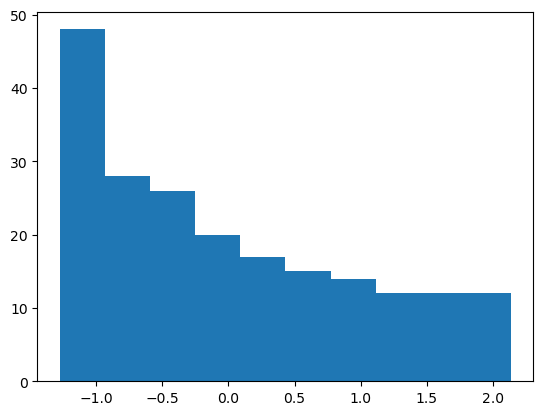

In [64]:
zscores = stats.zscore(epi_edges_vals)
plt.hist(zscores)

plt.show()